Практика №8

Загрузка библиотек:

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Задание №9

Загрузка данных из CSV файла: 

In [97]:
data = pd.read_csv('housePrice.csv')
data.head(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


Задание №10 (Предобработка данных)

In [98]:
data = data.drop(['Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price'], axis=1)
data.head(5)

,Area,Price(USD)
0,63,61666.67
1,60,61666.67
2,79,18333.33
3,95,30083.33
4,123,233333.33


In [99]:
data['Area'] = pd.to_numeric(data['Area'], downcast='integer', errors='coerce')
data = data.dropna()

In [100]:
X = pd.DataFrame(data, columns=['Area'])
y = pd.DataFrame(data, columns=['Price(USD)'])

X = np.array(X)
y = np.array(y)

Задание №11 (Реализация линейной регрессии без использования библиотеки)

In [115]:
def estimate_coef(X, y):
    n = np.size(X)

    m_x = np.mean(X)
    m_y = np.mean(y)

    SS_xy = np.sum(y*X) - n*m_y*m_x
    SS_xx = np.sum(X*X) - n*m_x*m_x

    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x     
    return (b_0, b_1)

b = estimate_coef(X, y)

y_pred = b[0] + b[1]*X


Задание №12 (Вывод угла наклона и y-перехвата)

In [118]:
print('Наклон линии регрессии: ', b[1], ' Точка пересечения линии регрессии: ', b[0])

Наклон линии регрессии:  2814.255602789658  Точка пересечения линии регрессии:  -122003.48674957766


Задание №13 (Построение диаграммы)

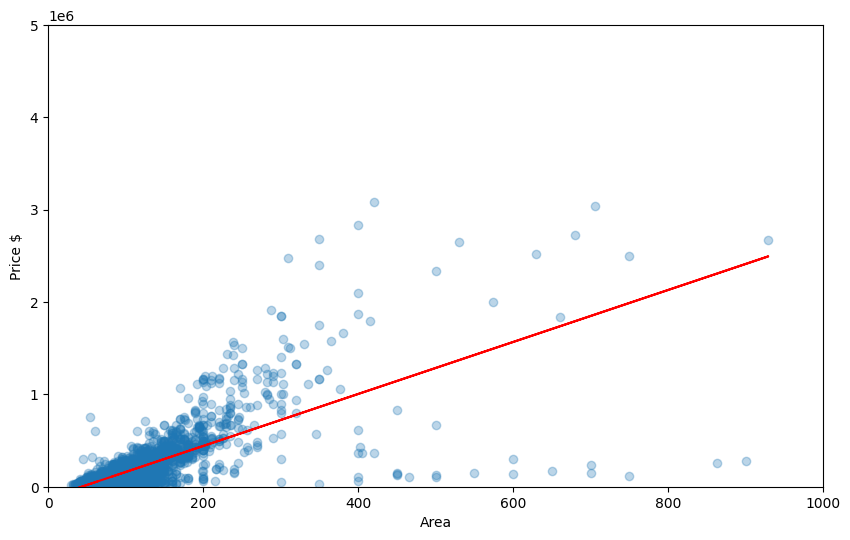

In [119]:
plt.figure(figsize=(10, 6))

plt.scatter(x=data['Area'], y=data['Price(USD)'], alpha=0.3)
plt.xlabel('Area')
plt.ylabel('Price $')
plt.xlim(0, 1000)
plt.ylim(0, 5000000)

plt.plot(X, y_pred, color='red');
